### Human Activity Recognition with Smartphone

Problem Statement

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

Why solve this project ?

This project comprises of exercises and tasks which will make you familiar and give you an in-depth knowledge of how and when to apply support vector machine algorithm moreover it will give you additional experience to fine tune your model and improve the predicting power even more.

- You will learn to explore data insights in depth
- You will learn to implement Support Vector Machines
- You will learn to perform feature selection with the help of Support Vector Machines
- You will learn to find best suitable hyperparameters with the help of grid search providing better understanding of the usage of hyperparmeter tuning.

In [22]:
import warnings
import pprint
import pandas as pd
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

##### Data loading

In [3]:
path

In [23]:
import pandas as pd
from collections import Counter

# Load dataset

data = pd.read_csv(path)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [24]:
# Check if there exists a null value in the dataset
print('Null Values In DataFrame: {}\n'.format(data.isnull().any().sum()))

# Check the statistical description of dataset
data.describe()

Null Values In DataFrame: 0



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

##### How labels are distributed ?

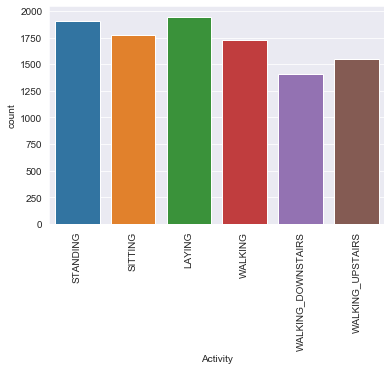

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style(style='darkgrid')

# Store the label values 
label = data['Activity']

# plot the countplot
sns.countplot(x= label)
plt.xticks(rotation=90)
plt.show()


##### How Long Does The Participant Use The Staircase?

INFO you can use - The description of the data states; "fixed-width sliding windows of 2.56 sec and 50% overlap" for each datapoint.Therefore a single datapoint is gathered every 1.28 sec.

In [46]:
# make the copy of dataset
data_copy = data.copy()

# Create an empty column 
data_copy['duration'] = ''

# Calculate the duration
duration_df = (data_copy.groupby([label[label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])], 'subject'])['duration'].count() * 1.28)
duration_df = pd.DataFrame(duration_df)
duration_df

duration
Activity           subject          
WALKING_DOWNSTAIRS 1           62.72
                   2           60.16
                   3           62.72
                   4           57.60
                   5           60.16
                   6           61.44
                   7           60.16
                   8           48.64
                   9           53.76
                   10          48.64
                   11          58.88
                   12          58.88
                   13          60.16
                   14          57.60
                   15          53.76
                   16          60.16
                   17          58.88
                   18          70.40
                   19          49.92
                   20          57.60
                   21          57.60
                   22          46.08
                   23          69.12
                   24          70.40
                   25          74.24
                   26          64.00
                   27          56.32
                   28          58.88
                   29          61.44
                   30          79.36
WALKING_UPSTAIRS   1           67.84
                   2           61.44
                   3           75.52
                   4           66.56
                   5           60.16
                   6           65.28
                   7           65.28
                   8           52.48
                   9           62.72
                   10          60.16
                   11          69.12
                   12          66.56
                   13          70.40
                   14          69.12
                   15          61.44
                   16          65.28
                   17          61.44
                   18          74.24
                   19          51.20
                   20          65.28
                   21          60.16
                   22          53.76
                   23          65.28
                   24          75.52
                   25          83.20
                   26          70.40
                   27          65.28
                   28          65.28
                   29          62.72
                   30          83.20

      Activity  subject  duration
59    Upstairs       30     83.20
54    Upstairs       25     83.20
29  Downstairs       30     79.36
53    Upstairs       24     75.52
32    Upstairs        3     75.52


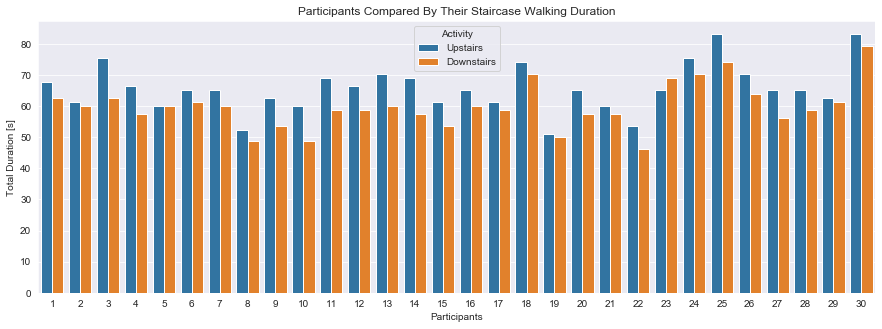

In [48]:
# Sort the values of duration
plot_data = duration_df.reset_index().sort_values('duration', ascending=False)
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})
print(plot_data.head())

# Plot the durations for staircase use
plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='duration', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

Observations

- Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks the participants need longer walking upstairs.
- Furthermore the range of the duration is narrow and adjusted to the conditions. A young person being ~50% fast in walking upstairs than an older one is reasonable.

##### Finding the correlation

In [49]:
#exclude the Activity column and the subject column
feature_cols = data.columns[: -2]   

#Calculate the correlation values
correlated_values = data[feature_cols].corr()
#stack the data and convert to a dataframe

correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlation_score'}))


#create an abs_correlation column
correlated_values['abs_correlation'] = correlated_values.Correlation_score.abs()

#Picking most correlated features without having self correlated pairs
top_corr_fields = correlated_values.sort_values('Correlation_score', ascending = False).query('abs_correlation>0.8 ')
top_corr_fields = top_corr_fields[top_corr_fields['Feature_1'] != top_corr_fields['Feature_2']].reset_index(drop=True)
top_corr_fields

,Feature_1,Feature_2,Correlation_score,abs_correlation
0,tBodyAccMag-mad(),tGravityAccMag-mad(),1.00,1.00
1,tBodyAccMag-std(),tGravityAccMag-std(),1.00,1.00
2,tBodyAccMag-mean(),tGravityAccMag-sma(),1.00,1.00
3,tBodyAccMag-mean(),tGravityAccMag-mean(),1.00,1.00
4,tBodyAccMag-mean(),tBodyAccMag-sma(),1.00,1.00
5,tBodyAccMag-max(),tGravityAccMag-max(),1.00,1.00
6,tBodyAccMag-min(),tGravityAccMag-min(),1.00,1.00
7,tBodyAccMag-sma(),tBodyAccMag-mean(),1.00,1.00
8,tBodyAccMag-arCoeff()3,tGravityAccMag-arCoeff()3,1.00,1.00
9,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.00,1.00


##### Data preparation and implementing baseline model

In [50]:
# importing neccessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score



# Encoding the target variable
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
X = data.iloc[:,:-1]    
y = data.iloc[:,-1]

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


# Baseline model 
classifier = SVC()
clf = classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision, recall, f_score, _ = error_metric(y_test, y_pred, average = 'weighted')
model1_score = accuracy_score(y_test, y_pred)
print(model1_score)
print(precision, recall, f_score)


0.9511326860841424
0.9509872667104282 0.9511326860841424 0.9510435802284054


##### Feature selection and removing top correlated variables

In [51]:
# importing libraries
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import LinearSVC

# Feature selection using Linear SVC
lsvc = LinearSVC(C = 0.01, penalty="l1", dual=False, random_state=42).fit(X_train, y_train)
model_2 = SelectFromModel(lsvc, prefit=True)
new_train_features = model_2.transform(X_train)
new_test_features = model_2.transform(X_test)

print(new_train_features.shape,new_test_features.shape )

# model building on reduced set of features
classifier_2 = SVC()
clf_2 = classifier_2.fit(new_train_features, y_train)
y_pred_new = clf_2.predict(new_test_features)
model2_score =accuracy_score(y_test, y_pred_new)
precision, recall, f_score, _ = error_metric(y_test, y_pred_new, average='weighted')
print(model2_score)
print(precision, recall, f_score)

(7209, 110) (3090, 110)
0.9686084142394822
0.9685979266204671 0.9686084142394822 0.9685926760840549


##### Hyperparameter Tuning for SVC with Grid Search and final model building.

In [52]:
# Importing Libraries
from sklearn.model_selection import GridSearchCV

# Set the hyperparmeters

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [100, 20, 1, 0.1]
}

# Usage of grid search to select the best hyperparmeters
selector = GridSearchCV(SVC(), parameters, scoring='accuracy') 
selector.fit(new_train_features, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()
    

# Model building after Hyperparameter tuning
classifier_3 = SVC(kernel='rbf', C=100)
clf_3 = classifier_3.fit(new_train_features, y_train)
y_pred_final = clf_3.predict(new_test_features)
model3_score = accuracy_score(y_test, y_pred_final)

print('Accuracy score:', model3_score)



Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.981 (+/-0.004) for {'C': 100, 'kernel': 'linear'}

0.986 (+/-0.003) for {'C': 100, 'kernel': 'rbf'}

0.981 (+/-0.000) for {'C': 20, 'kernel': 'linear'}

0.986 (+/-0.006) for {'C': 20, 'kernel': 'rbf'}

0.981 (+/-0.004) for {'C': 1, 'kernel': 'linear'}

0.961 (+/-0.007) for {'C': 1, 'kernel': 'rbf'}

0.977 (+/-0.007) for {'C': 0.1, 'kernel': 'linear'}

0.885 (+/-0.004) for {'C': 0.1, 'kernel': 'rbf'}

Accuracy score: 0.9864077669902913
